In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # one_hot True면 Y값을 one_hot으로 읽어옴

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes])) # input 784, output 10
b = tf.Variable(tf.random_normal([nb_classes])) # 나가는거 10개

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch:  0001 cost = 3.003811938
Epoch:  0002 cost = 1.088052399
Epoch:  0003 cost = 0.866260782
Epoch:  0004 cost = 0.759675840
Epoch:  0005 cost = 0.691962101
Epoch:  0006 cost = 0.644020107
Epoch:  0007 cost = 0.608367974
Epoch:  0008 cost = 0.579906712
Epoch:  0009 cost = 0.556276525
Epoch:  0010 cost = 0.536791839
Epoch:  0011 cost = 0.519390002
Epoch:  0012 cost = 0.504778290
Epoch:  0013 cost = 0.491194079
Epoch:  0014 cost = 0.479636551
Epoch:  0015 cost = 0.469050459
Accuracy:  0.89
Label:  [4]
Preduction:  [4]


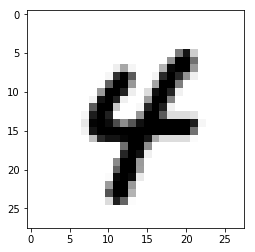

In [23]:
"""
-----------------------------------------------------------
"""
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# cost는 크로스 엔트로피??를 사용 할 꺼임
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

"""
-----------------------------------------------------------
Softmax cliassfier for MNIST
여기까지 이 세줄밖에 안되는 모델로 90% 성능을 냈다.
"""
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1)) # one_hot인 Y
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
# 데이터가 크니깐 한꺼번에 할수없으니 조금씩 학습
# epoch: 몇갠지는 모르지만 전체 데이터셋을 한번 다 학습시킨것을 1 epoch
# batch_size: 전체 데이터를 한꺼번에 메모리에 못올릴때 짤라서 올리는데 그 size
# iterations: 전체 데이터가 1000개이고 batch_size가 500개 일때 1 epoch을 하기 위해선 2 iterations을 돌아야한다.
training_epochs = 15
batch_size = 100

with tf.Session() as sess: # 세션 열고
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs): # 15번 돌아가겠지
        avg_cost = 0
        # 전체 사이즈를 batch_size로 나누면 iterations 수 구할 수있음
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch): # i가 iterations
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 100개씩 읽어와서 학습을 함
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        
        print('Epoch: ', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
    # sess.run()으로 돌릴 수도 있고, accuracy.eval()로도 돌릴 수 있음
    print("Accuracy: ", accuracy.eval(session=sess,
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    """
    잘 돌아가는지 테스트해보자
    """
    import matplotlib.pyplot as plt
    import random

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    # test할 데이터 하나 읽어와서 그 레이블이 뭔지,
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1))) 
    # 예측하는 건 hypothesis를 실행시키고 거기에 맞는 이미치를 던져줌
    print("Preduction: ", sess.run(tf.argmax(hypothesis, 1),
                                   feed_dict={X: mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].
              reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()